# Project Documentation:FX Option By Heston-Hull-White model and Volatility Modeling



---

## 1. Simulation Using Euler Discretization

### 1.1. Initialization

- **Simulation Parameters:**  
  - **Number of Paths:** $N_{\text{paths}}$
  - **Number of Time Steps:** $N_{\text{steps}}$
  - **Total Time:** $T$
  - **Time Increment:** 
    $$
    \Delta t = \frac{T}{N_{\text{steps}}}
    $$

- **State Variables and Initial Conditions:**  
  - FX forward rate: $FX(0) = \text{frwdFX}$
  - Variance process: $V(0) = v_0$

- **Brownian Motion Arrays:**  
  Four independent (but correlated) Brownian motions are simulated:
  $$
  W_x,\, W_v,\, W_{rd},\, W_{rf}
  $$

### 1.2. Discount Factor Functions

The discount factors (in Hull–White style) are defined as:
$$
B_d(t,T) = \frac{1}{\lambda_d} \left(e^{-\lambda_d (T-t)} - 1\right)
$$
$$
B_f(t,T) = \frac{1}{\lambda_f} \left(e^{-\lambda_f (T-t)} - 1\right)
$$

### 1.3. Covariance Matrix

The four Brownian motions are correlated with the covariance matrix:
$$
\text{cov} =
\begin{pmatrix}
1 & \rho_{xv} & \rho_{xrd} & \rho_{xrf} \\
\rho_{xv} & 1 & \rho_{vrd} & \rho_{vrf} \\
\rho_{xrd} & \rho_{vrd} & 1 & \rho_{rdrf} \\
\rho_{xrf} & \rho_{vrf} & \rho_{rdrf} & 1
\end{pmatrix}
$$

### 1.4. Update Equations in the Simulation Loop

#### Brownian Increments

Each Brownian motion is updated as:
$$
W_k(t+\Delta t) = W_k(t) + \sqrt{\Delta t}\,Z_k,\quad k \in \{x, v, rd, rf\}
$$
where $Z_k$ is drawn from a multivariate normal distribution with the above covariance.

#### Variance Process Update

The variance process is updated using an Euler–Maruyama scheme with a CIR-like (mean-reverting) process:
$$
V(t+\Delta t) = V(t) + \underbrace{\kappa\left(v_{\text{bar}} - V(t)\right)\Delta t}_{\text{Mean Reversion Drift}} + \underbrace{\gamma \sqrt{V(t)} \left(W_v(t+\Delta t)-W_v(t)\right)}_{\text{Diffusion Term}}
$$
with an additional drift adjustment due to rate effects:
$$
+\; \gamma \,\rho_{vrd}\,\eta_d\,B_d(t,T)\,\sqrt{V(t)}\,\Delta t
$$

To ensure non-negativity of variance:
$$
V(t+\Delta t) = \max\{ V(t+\Delta t), 0 \}
$$

#### FX Process Update

The FX rate is updated as:
$$
FX(t+\Delta t) = FX(t)\Biggl[ 1 + \underbrace{\sqrt{V(t)}\Delta W_x}_{\text{Volatility Shock}} - \underbrace{\eta_d\,B_d(t,T)\Delta W_{rd}}_{\text{Discount Factor Adjustment}} + \underbrace{\eta_f\,B_f(t,T)\Delta W_{rf}}_{\text{Forward Rate Adjustment}} \Biggr]
$$

---

## 2. Expectation of the Square Root of Variance

For a CIR process, the expectation of $\sqrt{V(t)}$ is given analytically by:
$$
E\left[\sqrt{V(t)}\right] = \sqrt{2\,c(t)}\; \frac{\Gamma\left(\frac{1+\delta}{2}\right)}{\Gamma\left(\frac{\delta}{2}\right)} \; {}_1F_1\left(-\frac{1}{2}, \frac{\delta}{2}, -\frac{\bar{\kappa}(t)}{2}\right)
$$
where:
- $$
\delta = \frac{4\kappa v_{\text{bar}}}{\gamma^2}
$$
- $$
c(t) = \frac{\gamma^2}{4\kappa} \left(1 - e^{-\kappa t}\right)
$$
- $$
\bar{\kappa}(t) = \frac{4 \kappa v_0 e^{-\kappa t}}{\gamma^2\left(1-e^{-\kappa t}\right)}
$$
- ${}_1F_1$ is the confluent hypergeometric function.

---

## 3. Characteristic Function Components

### 3.1. The $C(u,\tau)$ Component

The function $C(u,\tau)$ in the characteristic function is calculated as:
$$
D_1 = \sqrt{\left(\kappa - \gamma\,\rho_{xv}\,i\,u\right)^2 + \gamma^2 \left(u^2 + i\,u\right)}
$$
$$
g = \frac{\kappa - \gamma\,\rho_{xv}\,i\,u - D_1}{\kappa - \gamma\,\rho_{xv}\,i\,u + D_1}
$$
$$
C(u,\tau) = \frac{1 - e^{-D_1 \tau}}{\gamma^2 \left(1 - g \, e^{-D_1 \tau}\right)} \left(\kappa - \gamma\,\rho_{xv}\,i\,u - D_1\right)
$$

### 3.2. The Full Characteristic Function

The full characteristic function is given by:
$$
\phi(u) = \exp\left(A + v_0\, C(u,\tau)\right)
$$
where the exponent $A$ is composed of two parts:
1. **Integral Term $I_1(u)$:**  
   $$ 
   I_1(u) = \int_0^\tau \left[\text{temp1}(z) + \text{temp2}(z,u) + \text{temp3}(z,u)\right] C(u,z)\,dz 
   $$
   with the following temporary definitions:
   - $$
   \text{temp1}(z) = \kappa\, v_{\text{bar}} + R_{vrd}\,\gamma\,\eta_d\,G(\tau-z)\,B_d(\tau-z,\tau)
   $$
   - $$
   \text{temp2}(z,u) = -R_{vrd}\,\gamma\,\eta_d\,G(\tau-z)\,B_d(\tau-z,\tau)\,i\,u
   $$
   - $$
   \text{temp3}(z,u) = R_{vrf}\,\gamma\,\eta_f\,G(\tau-z)\,B_f(\tau-z,\tau)\,i\,u
   $$
2. **Additional Term $I_2(u)$:**
   $$
   I_2(u) = \left(u^2 + i\,u \right) \int_0^\tau \zeta(\tau-z)\,dz
   $$
   where
   $$
   \zeta(t) = \left(R_{xrd}\,\eta_d\,B_d(t,t)-R_{xrf}\,\eta_f\,B_f(t,t)\right)G(t) + R_{rdrf}\,\eta_d\,\eta_f\,B_d(t,t)\,B_f(t,t) - \frac{1}{2}\left(\eta_d^2\,B_d(t,t)^2+\eta_f^2\,B_f(t,t)^2\right)
   $$

Thus, combining these two terms:
$$
A = I_1(u) + I_2(u)
$$

And finally:
$$
\phi(u) = \exp\left(A + v_0\, C(u,\tau)\right)
$$

---

## 4. Strike Price Generation

To generate a set of strikes around a given FX forward rate, we use:
$$
K = \text{frwd} \times \exp\left(0.1 \times c_n \times \sqrt{T_i}\right)
$$
where $c_n$ is a vector such as:
$$
c_n = [-1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5]
$$
and $T_i$ is the time to maturity.

---

## Summary

- **Euler Discretization:**  
  Propagates the dynamics:
  $$
  x(t+\Delta t) = x(t) + \text{drift}\cdot \Delta t + \sqrt{\Delta t}\,\text{diffusion}\cdot Z
  $$
- **Variance Process:**  
  Modeled as a CIR-like process:
  $$
  V(t+\Delta t) = V(t) + \kappa\left(v_{\text{bar}} - V(t)\right)\Delta t + \gamma \sqrt{V(t)}\,\Delta W
  $$
- **Characteristic Function and Fourier Pricing:**  
  Uses complex function components $C(u,\tau)$ and the integrated exponent $A$ to determine:
  $$
  \phi(u) = \exp\left(A + v_0\, C(u,\tau)\right)
  $$
- **Strike Generation:**  
  Produces logarithmically spaced strikes:
  $$
  K = \text{frwd} \times \exp\left(0.1 \times c_n \times \sqrt{T_i}\right)
  $$

This Markdown cell synthesizes the theory and formulas used in our simulation, expectation calculation, and option pricing framework. It can be easily pasted into a Jupyter Notebook for documentation or further exploration.


Seed number = 0 out of 20
Seed number = 1 out of 20
Seed number = 2 out of 20
Seed number = 3 out of 20
Seed number = 4 out of 20
Seed number = 5 out of 20
Seed number = 6 out of 20
Seed number = 7 out of 20
Seed number = 8 out of 20
Seed number = 9 out of 20
Seed number = 10 out of 20
Seed number = 11 out of 20
Seed number = 12 out of 20
Seed number = 13 out of 20
Seed number = 14 out of 20
Seed number = 15 out of 20
Seed number = 16 out of 20
Seed number = 17 out of 20
Seed number = 18 out of 20
Seed number = 19 out of 20
Martingale check: P_d(T)/P_f(T)*E[FX(T)] =1.3318 and y0 =1.35
Maturity chosen to T=5.0
Option price for strike K=0.8309 is equal to: COS method = 0.4213 and MC = 0.4218 with stdDev = 0.0110
Option price for strike K=0.9291 is equal to: COS method = 0.3707 and MC = 0.3710 with stdDev = 0.0107
Option price for strike K=1.0390 is equal to: COS method = 0.3202 and MC = 0.3203 with stdDev = 0.0104
Option price for strike K=1.1620 is equal to: COS method = 0.2711 and MC =

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18908\1456467922.py:18: RuntimeWarning: divide by zero encountered in divide
  d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_18908\1456467922.py:18: RuntimeWarning: invalid value encountered in divide
  d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0))


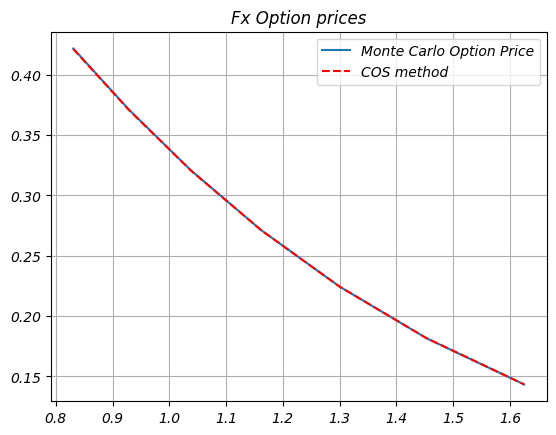

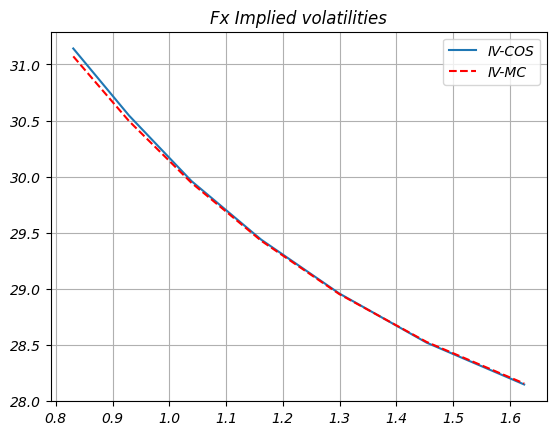

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.special as sp
import scipy.integrate as integrate
import scipy.optimize as optimize
import enum
import numpy as np

class OptionType(enum.Enum):

    CALL = 1.0
    PUT = -1.0

 #Black-Scholes Call option price
def BS_Call_Put_Option_Price(CP,S_0,K,sigma,tau,r):
    if K is list:
        K = np.array(K).reshape([len(K),1])
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0))
    * tau) / (sigma * np.sqrt(tau))
    d2    = d1 - sigma * np.sqrt(tau)
    if CP == OptionType.CALL:
        value = stats.norm.cdf(d1) * S_0 - stats.norm.cdf(d2) * K * np.exp(-r * tau)
    elif CP == OptionType.PUT:
        value = stats.norm.cdf(-d2) * K * np.exp(-r * tau) - stats.norm.cdf(-d1)*S_0
    return value

# Implied volatility method
def ImpliedVolatilityBlack76(CP,marketPrice,K,T,S_0):
    # To determine initial volatility we interpolate define a grid for sigma
    # and interpolate on the inverse
    sigmaGrid = np.linspace(0.0,5.0,5000)
    optPriceGrid = BS_Call_Put_Option_Price(CP,S_0,K,sigmaGrid,T,0.0)
    sigmaInitial = np.interp(marketPrice,optPriceGrid,sigmaGrid)
    print("Strike = {0}".format(K))
    print("Initial volatility = {0}".format(sigmaInitial))

    # Use determined input for the local-search (final tuning)
    func = lambda sigma: np.power(BS_Call_Put_Option_Price(CP, S_0, K, sigma, T, 0.0) - marketPrice, 1.0)
    impliedVol = optimize.newton(func, sigmaInitial, tol=1e-15)
    print("Final volatility = {0}".format(impliedVol))
    if impliedVol > 2.0:
        impliedVol = 0.0
    return impliedVol

def CallPutOptionPriceCOSMthd_StochIR(cf,CP,S0,tau,K,N,L,P0T):
    # cf   - characteristic function as a functon, in the book denoted as \varphi
    # CP   - C for call and P for put
    # S0   - Initial stock price
    # tau  - time to maturity
    # K    - list of strikes
    # N    - Number of expansion terms
    # L    - size of truncation domain (typ.:L=8 or L=10)
    # P0T  - zero-coupon bond for maturity T.
    if K is not np.array:
        K = np.array(K).reshape([len(K), 1])

        # assigning i=sqrt(-1)
    i = 1j
    x0 = np.log(S0 / K)

    # truncation domain
    a = 0.0 - L * np.sqrt(tau)
    b = 0.0 + L * np.sqrt(tau)

    # sumation from k = 0 to k=N-1
    k = np.linspace(0, N - 1, N).reshape([N, 1])
    u = k * np.pi / (b - a)
    H_k = CallPutCoefficients(OptionType.PUT, a, b, k)
    mat = np.exp(i * np.outer((x0 - a), u))
    temp = cf(u) * H_k
    temp[0] = 0.5 * temp[0]
    value = K * np.real(mat.dot(temp))

    # we use call-put parity for call options
    if CP == OptionType.CALL:
        value = value + S0 - K * P0T

    return value


# Determine coefficients for Put Prices
def CallPutCoefficients(CP, a, b, k):
    if CP == OptionType.CALL:
        c = 0.0
        d = b
        coef = Chi_Psi(a, b, c, d, k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        if a < b and b < 0.0:
            H_k = np.zeros([len(k), 1])
        else:
            H_k = 2.0 / (b - a) * (Chi_k - Psi_k)
    elif CP == OptionType.PUT:
        c = a
        d = 0.0
        coef = Chi_Psi(a, b, c, d, k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        H_k = 2.0 / (b - a) * (- Chi_k + Psi_k)

    return H_k


def Chi_Psi(a, b, c, d, k):
    psi = np.sin(k * np.pi * (d - a) / (b - a)) - np.sin(k * np.pi * (c - a) / (b - a))
    psi[1:] = psi[1:] * (b - a) / (k[1:] * np.pi)
    psi[0] = d - c

    chi = 1.0 / (1.0 + np.power((k * np.pi / (b - a)), 2.0))
    expr1 = np.cos(k * np.pi * (d - a) / (b - a)) * np.exp(d) - np.cos(k * np.pi
                                                                       * (c - a) / (b - a)) * np.exp(c)
    expr2 = k * np.pi / (b - a) * np.sin(k * np.pi *
                                         (d - a) / (b - a)) - k * np.pi / (b - a) * np.sin(k
                                                                                           * np.pi * (c - a) / (
                                                                                                       b - a)) * np.exp(
        c)
    chi = chi * (expr1 + expr2)

    value = {"chi": chi, "psi": psi}
    return value

def EUOptionPriceFromMCPathsGeneralizedFXFrwd(CP,S,K):
    # S is a vector of Monte Carlo samples at T
    result = np.zeros([len(K),1])
    if CP == OptionType.CALL:
        for (idx,k) in enumerate(K):
            result[idx] = np.mean(np.maximum(S-k,0.0))
    elif CP == OptionType.PUT:
        for (idx,k) in enumerate(K):
            result[idx] = np.mean(np.maximum(k-S,0.0))
    return result


def GeneratePathsHHWFXHWEuler(NoOfPaths, NoOfSteps, T, frwdFX, v0, vbar, kappa, gamma, lambdd, lambdf, etad, etaf,
                              rhoxv, rhoxrd, rhoxrf, rhovrd, rhovrf, rhordrf):
    Wx = np.zeros([NoOfPaths, NoOfSteps + 1])
    Wv = np.zeros([NoOfPaths, NoOfSteps + 1])
    Wrd = np.zeros([NoOfPaths, NoOfSteps + 1])
    Wrf = np.zeros([NoOfPaths, NoOfSteps + 1])

    V = np.zeros([NoOfPaths, NoOfSteps + 1])
    FX = np.zeros([NoOfPaths, NoOfSteps + 1])
    V[:, 0] = v0
    FX[:, 0] = frwdFX

    dt = T / float(NoOfSteps)
    Bd = lambda t, T: 1.0 / lambdd * (np.exp(-lambdd * (T - t)) - 1.0)
    Bf = lambda t, T: 1.0 / lambdf * (np.exp(-lambdf * (T - t)) - 1.0)

    cov = np.array([[1.0, rhoxv, rhoxrd, rhoxrf], [rhoxv, 1.0, rhovrd, rhovrf], \
                    [rhoxrd, rhovrd, 1.0, rhordrf], [rhoxrf, rhovrf, rhordrf, 1.0]])

    time = np.zeros([NoOfSteps + 1])

    for i in range(0, NoOfSteps):
        Z = np.random.multivariate_normal([.0, .0, .0, .0], cov, NoOfPaths)
        if NoOfPaths > 1:
            Z[:, 0] = (Z[:, 0] - np.mean(Z[:, 0])) / np.std(Z[:, 0])
            Z[:, 1] = (Z[:, 1] - np.mean(Z[:, 1])) / np.std(Z[:, 1])
            Z[:, 2] = (Z[:, 2] - np.mean(Z[:, 2])) / np.std(Z[:, 2])
            Z[:, 3] = (Z[:, 3] - np.mean(Z[:, 3])) / np.std(Z[:, 3])

        Wx[:, i + 1] = Wx[:, i] + np.power(dt, 0.5) * Z[:, 0]
        Wv[:, i + 1] = Wv[:, i] + np.power(dt, 0.5) * Z[:, 1]
        Wrd[:, i + 1] = Wrd[:, i] + np.power(dt, 0.5) * Z[:, 2]
        Wrf[:, i + 1] = Wrf[:, i] + np.power(dt, 0.5) * Z[:, 3]

        # Variance process- Euler discretization
        V[:, i + 1] = V[:, i] + kappa * (vbar - V[:, i]) * dt \
                      + gamma * rhovrd * etad * Bd(time[i], T) * np.sqrt(V[:, i]) * dt \
                      + gamma * np.sqrt(V[:, i]) * (Wv[:, i + 1] - Wv[:, i])
        V[:, i + 1] = np.maximum(V[:, i + 1], 0.0)

        # FX process under the forward measure
        FX[:, i + 1] = FX[:, i] * (1.0 + np.sqrt(V[:, i]) * (Wx[:, i + 1] - Wx[:, i]) \
                                   - etad * Bd(time[i], T) * (Wrd[:, i + 1] - Wrd[:, i]) \
                                   + etaf * Bf(time[i], T) * (Wrf[:, i + 1] - Wrf[:, i]))
        time[i + 1] = time[i] + dt

    paths = {"time": time, "FX": FX}
    return paths


# Exact expectation E(sqrt(V(t)))
def meanSqrtV_3(kappa, v0, vbar, gamma):
    delta = 4.0 * kappa * vbar / gamma / gamma
    c = lambda t: 1.0 / (4.0 * kappa) * gamma * gamma * (1.0 - np.exp(-kappa * (t)))
    kappaBar = lambda t: 4.0 * kappa * v0 * np.exp(-kappa * t) / (gamma * gamma * (1.0 - np.exp(-kappa * t)))
    temp1 = lambda t: np.sqrt(2.0 * c(t)) * sp.gamma((1.0 + delta) / 2.0) / sp.gamma(delta / 2.0) * sp.hyp1f1(-0.5,
                                                                                                              delta / 2.0,
                                                                                                              -kappaBar(
                                                                                                                  t) / 2.0)
    return temp1


def C_H1HW_FX(u, tau, kappa, gamma, rhoxv):
    i = 1j

    D1 = np.sqrt(np.power(kappa - gamma * rhoxv * i * u, 2.0) + (u * u + i * u) * gamma * gamma)
    g = (kappa - gamma * rhoxv * i * u - D1) / (kappa - gamma * rhoxv * i * u + D1)
    C = (1.0 - np.exp(-D1 * tau)) / (gamma * gamma * (1.0 - g * np.exp(-D1 * tau))) \
        * (kappa - gamma * rhoxv * i * u - D1)
    return C

def GenerateStrikes(frwd,Ti):
    c_n = np.array([-1.5, -1.0, -0.5,0.0, 0.5, 1.0, 1.5])
    return frwd * np.exp(0.1 * c_n * np.sqrt(Ti))
def ChFH1HW_FX(u, tau, gamma, Rxv, Rxrd, Rxrf, Rrdrf, Rvrd, Rvrf, lambdd, etad, lambdf, etaf, kappa, vBar, v0):
    i = 1j
    C = lambda u, tau: C_H1HW_FX(u, tau, kappa, gamma, Rxv)
    Bd = lambda t, T: 1.0 / lambdd * (np.exp(-lambdd * (T - t)) - 1.0)
    Bf = lambda t, T: 1.0 / lambdf * (np.exp(-lambdf * (T - t)) - 1.0)
    G = meanSqrtV_3(kappa, v0, vBar, gamma)

    zeta = lambda t: (Rxrd * etad * Bd(t, tau) - Rxrf * etaf * Bf(t, tau)) * G(t) + \
                     Rrdrf * etad * etaf * Bd(t, tau) * Bf(t, tau) - 0.5 * (
                                 etad ** 2.0 * Bd(t, tau) ** 2.0 + etaf ** 2.0 * Bf(t, tau) ** 2.0)

    # Integration in the function A(u,tau)
    int1 = np.zeros([len(u), 1], dtype=np.complex_)
    N = 500
    z = np.linspace(0.0 + 1e-10, tau - 1e-10, N)

    temp1 = lambda z1: kappa * vBar + Rvrd * gamma * etad * G(tau - z1) * Bd(tau - z1, tau)
    temp2 = lambda z1, u: -Rvrd * gamma * etad * G(tau - z1) * Bd(tau - z1, tau) * i * u
    temp3 = lambda z1, u: Rvrf * gamma * etaf * G(tau - z1) * Bf(tau - z1, tau) * i * u
    f = lambda z1, u: (temp1(z1) + temp2(z1, u) + temp3(z1, u)) * C(u, z1)

    value1 = integrate.trapz(np.real(f(z, u)), z).reshape(u.size, 1)
    value2 = integrate.trapz(np.imag(f(z, u)), z).reshape(u.size, 1)
    int1 = (value1 + value2 * i)
    int2 = (u ** 2.0 + i * u) * integrate.trapz(zeta(tau - z), z)
    A = int1 + int2

    cf = np.exp(A + v0 * C(u, tau))
    return cf


def mainCalculation():
    CP = OptionType.CALL
    T = 5.0

    NoOfPaths = 1000
    NoOfSteps = (int)(T * 50)

    # Settings for the COS method
    N = 500
    L = 8

    # Market Settings
    P0Td = lambda t: np.exp(-0.02 * t)
    P0Tf = lambda t: np.exp(-0.05 * t)
    y0 = 1.35
    frwdFX = y0 * P0Tf(T) / P0Td(T)
    kappa = 0.5
    gamma = 0.3
    vbar = 0.1
    v0 = 0.1

    # HW model settings
    lambdd = 0.01
    lambdf = 0.05
    etad = 0.007
    etaf = 0.012

    # correlations
    Rxv = -0.4
    Rxrd = -0.15
    Rxrf = -0.15
    Rvrd = 0.3
    Rvrf = 0.3
    Rrdrf = 0.25

    # Strikes
    K = GenerateStrikes(frwdFX, T)
    K = np.array(K).reshape([len(K), 1])

    # number of repeated simulations for different Monte Carlo seed
    SeedV = range(0, 20)
    optMCM = np.zeros([len(SeedV), len(K)])
    for (idx, seed) in enumerate(SeedV):
        print('Seed number = {0} out of {1}'.format(idx, len(SeedV)))
        np.random.seed(seed)
        paths = GeneratePathsHHWFXHWEuler(NoOfPaths, NoOfSteps, T, frwdFX, v0, vbar, kappa, gamma, lambdd, lambdf, etad,
                                          etaf, Rxv, Rxrd, Rxrf, Rvrd, Rvrf, Rrdrf)
        frwdfxT = paths["FX"]
        optMC = P0Td(T) * EUOptionPriceFromMCPathsGeneralizedFXFrwd(CP, frwdfxT[:, -1], K)
        optMCM[idx, :] = np.squeeze(optMC)

    # Average of the runs + standard deviation
    optionMC_E = np.zeros([len(K)])
    optionMC_StDev = np.zeros([len(K)])
    for (idx, k) in enumerate(K):
        optionMC_E[idx] = np.mean(optMCM[:, idx])
        optionMC_StDev[idx] = np.std(optMCM[:, idx])

    # Value from the COS method
    cf = lambda u: ChFH1HW_FX(u, T, gamma, Rxv, Rxrd, Rxrf, Rrdrf, Rvrd, Rvrf, lambdd, etad, lambdf, etaf, kappa, vbar,
                              v0)
    valCOS_H1HW = P0Td(T) * CallPutOptionPriceCOSMthd_StochIR(cf, CP, frwdFX, T, K, N, L, 1.0)

    # checking martingale property
    EyT = P0Td(T) / P0Tf(T) * EUOptionPriceFromMCPathsGeneralizedFXFrwd(CP, frwdfxT[:, -1], [0.0])
    print("Martingale check: P_d(T)/P_f(T)*E[FX(T)] ={0:.4f} and y0 ={1}".format(EyT[0][0], y0))
    print("Maturity chosen to T={0}".format(T))
    for (idx, k) in enumerate(K):
        print(
            "Option price for strike K={0:.4f} is equal to: COS method = {1:.4f} and MC = {2:.4f} with stdDev = {3:.4f}".format(
                k[0], valCOS_H1HW[idx][0], optionMC_E[idx], optionMC_StDev[idx]))

    plt.figure(1)
    plt.plot(K, optionMC_E)
    plt.plot(K, valCOS_H1HW, '--r')
    plt.grid()
    plt.legend(['Monte Carlo Option Price', 'COS method'])
    plt.title("Fx Option prices")

    # implied volatilities
    IVCos = np.zeros([len(K), 1])
    IVMC = np.zeros([len(K), 1])
    for (idx, k) in enumerate(K):
        priceCOS = valCOS_H1HW[idx] / P0Td(T)
        IVCos[idx] = ImpliedVolatilityBlack76(CP, priceCOS, k, T, frwdFX) * 100.0
        priceMC = optionMC_E[idx] / P0Td(T)
        IVMC[idx] = ImpliedVolatilityBlack76(CP, priceMC, k, T, frwdFX) * 100.0

    plt.figure(2)
    plt.plot(K, IVMC)
    plt.plot(K, IVCos, '--r')

    plt.grid()
    plt.legend(['IV-COS', 'IV-MC'])
    plt.title("Fx Implied volatilities")


mainCalculation()